##🏠 California Housing Price Prediction - Regression Project

#📌 Project Overview

This project focuses on predicting California housing prices using multiple regression models. It covers the entire data science pipeline from data loading, exploration, model training, evaluation, visualization, and model comparison.[link text](https://)

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics

📁 Dataset Overview

fetch_california_housing() from sklearn.datasets

In [120]:
from sklearn.datasets import fetch_california_housing

In [121]:
house_price_dataset = sklearn.datasets.fetch_california_housing()

In [122]:
print(house_price_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [123]:
# Loading the dataset to a Pandas DataFrame
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)

In [124]:
# Print First 5 rows of our DataFrame
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [125]:
# add the target (price) column to the DataFrame
house_price_dataframe['price'] = house_price_dataset.target

In [126]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [127]:
# checking the number of rows and Columns in the data frame
house_price_dataframe.shape

(20640, 9)

In [128]:
# check for missing values
house_price_dataframe.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
price,0


In [129]:
# statistical measures of the dataset
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


🔍 Exploratory Data Analysis (EDA)

Constructed heatmap of correlation matrix to identify feature relationships

In [130]:
correlation = house_price_dataframe.corr()

<Axes: >

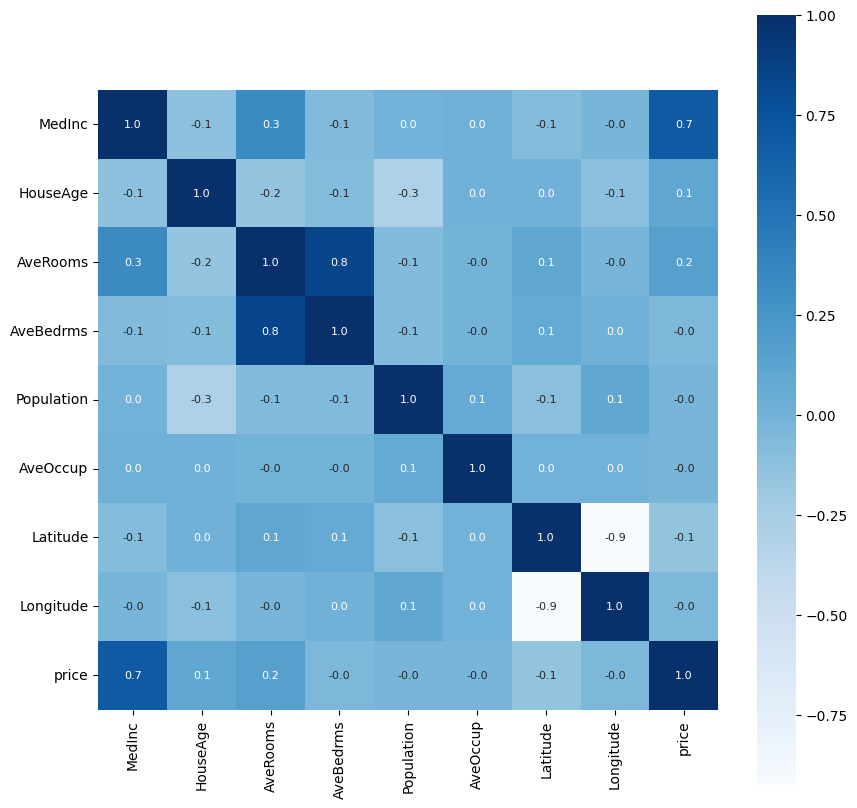

In [131]:
# constructing a heatmap to nderstand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [132]:
X = house_price_dataframe.drop(['price'], axis=1)
Y = house_price_dataframe['price']

In [133]:
print(X)
print(Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

##📈 Model Training & Evaluation

✅ Models Used:

Linear Regression (Baseline)

Random Forest Regressor (with GridSearchCV)

XGBoost Regressor (with GridSearchCV)

⚙️ Model Tuning:

Used GridSearchCV to find the best hyperparameters for Random Forest and XGBoost with 5-fold cross-validation.

In [134]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [135]:
print(X.shape, X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


# ✅ XGBoost with GridSearchCV

In [136]:
xgb_params = {'n_estimators': [100, 200], 'max_depth': [3, 5, 7]}
xgb_grid = GridSearchCV(XGBRegressor(), xgb_params, cv=5, scoring='r2', n_jobs=-1)
xgb_grid.fit(X_train, Y_train)

xgb_best_model = xgb_grid.best_estimator_
xgb_test_pred = xgb_best_model.predict(X_test)

In [137]:
xgb_best_model = xgb_grid.best_estimator_
xgb_test_pred = xgb_best_model.predict(X_test)

In [139]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [141]:
xgb_r2 = r2_score(Y_test, xgb_test_pred)
xgb_mae = mean_absolute_error(Y_test, xgb_test_pred)
xgb_rmse = np.sqrt(mean_squared_error(Y_test, xgb_test_pred))

In [142]:
print("✅ XGBoost Best Parameters:", xgb_grid.best_params_)
print("XGBoost Test R²:", xgb_r2)
print("XGBoost Test MAE:", xgb_mae)
print("XGBoost Test RMSE:", xgb_rmse)

✅ XGBoost Best Parameters: {'max_depth': 5, 'n_estimators': 200}
XGBoost Test R²: 0.8407195706902237
XGBoost Test MAE: 0.3043820371497925
XGBoost Test RMSE: 0.4632004137162026


Residual Plot: Distribution of residuals (XGBoost)

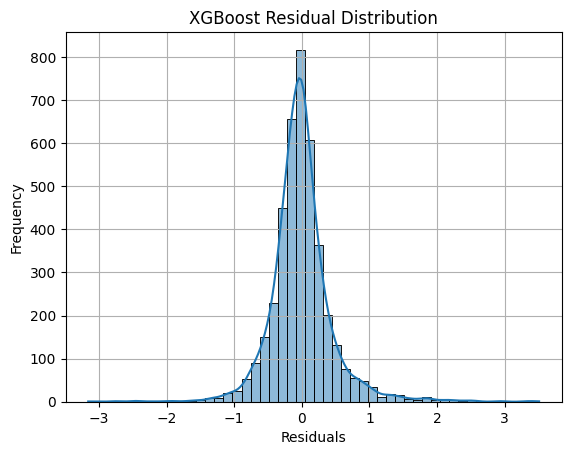

In [165]:
residuals = Y_test - xgb_test_pred

sns.histplot(residuals, kde=True, bins=50)
plt.title("XGBoost Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# ✅ Random Forest with GridSearchCV

In [143]:
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]}

rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5, scoring='r2', n_jobs=-1)
rf_grid.fit(X_train, Y_train)

rf_best_model = rf_grid.best_estimator_
rf_test_pred = rf_best_model.predict(X_test)



In [144]:

rf_r2 = r2_score(Y_test, rf_test_pred)
rf_mae = mean_absolute_error(Y_test, rf_test_pred)
rf_rmse = np.sqrt(mean_squared_error(Y_test, rf_test_pred))

print("\n✅ Random Forest Best Parameters:", rf_grid.best_params_)
print("Random Forest Test R²:", rf_r2)
print("Random Forest Test MAE:", rf_mae)
print("Random Forest Test RMSE:", rf_rmse)


✅ Random Forest Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Test R²: 0.8052172559700082
Random Forest Test MAE: 0.3331485529312019
Random Forest Test RMSE: 0.5122275930940918


# ✅ Linear Regression

In [145]:
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

lr_pred = lr_model.predict(X_test)

lr_r2 = r2_score(Y_test, lr_pred)
lr_mae = mean_absolute_error(Y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(Y_test, lr_pred))

In [146]:

print("\n✅ Linear Regression Test R²:", lr_r2)
print("Linear Regression Test MAE:", lr_mae)
print("Linear Regression Test RMSE:", lr_rmse)


✅ Linear Regression Test R²: 0.6013853272055152
Linear Regression Test MAE: 0.5358292549657769
Linear Regression Test RMSE: 0.7327644142619786


## 🏁 Model Comparison
| Model             | R² Score | MAE   | RMSE  |
|------------------|----------|-------|--------|
| XGBoost          | 0.841    | 0.304 | 0.463  |
| Random Forest    | 0.805    | 0.333 | 0.512  |
| Linear Regression| 0.601    | 0.536 | 0.733  |

#Scatter Plot: Actual vs Predicted prices for all models

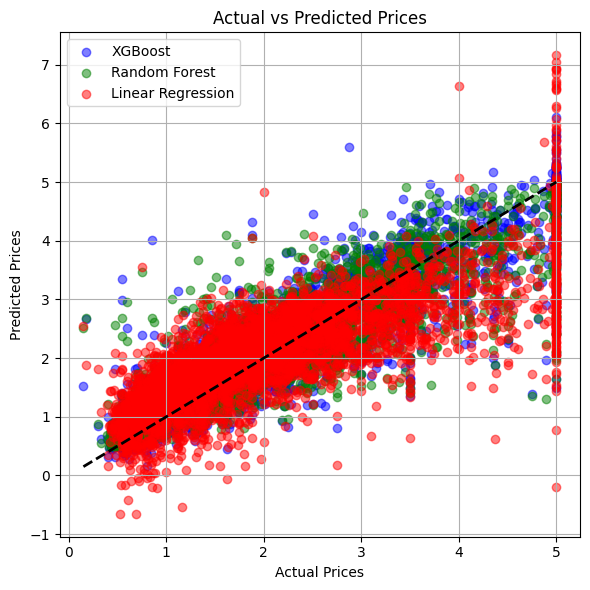

In [147]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(Y_test, xgb_test_pred, color='blue', alpha=0.5, label='XGBoost')
plt.scatter(Y_test, rf_test_pred, color='green', alpha=0.5, label='Random Forest')
plt.scatter(Y_test, lr_pred, color='red', alpha=0.5, label='Linear Regression')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##📉Bar Plots:
R² comparison

RMSE comparison

MAE comparison





<ipython-input-163-1744d02313e1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=r2_values, palette='Set1', hue=None)


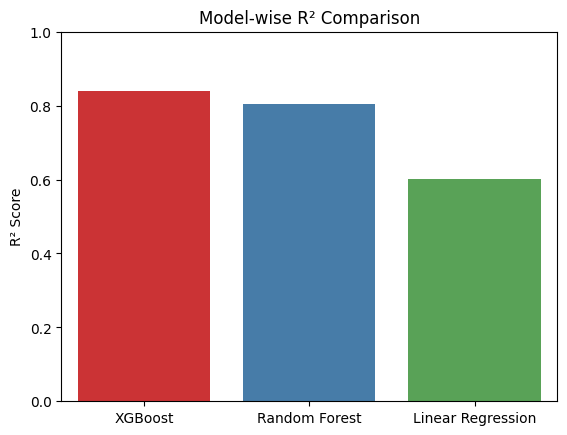

In [163]:
r2_values = [xgb_r2, rf_r2, lr_r2]

sns.barplot(x=models, y=r2_values, palette='Set1', hue=None)
plt.ylabel("R² Score")
plt.title("Model-wise R² Comparison")
plt.ylim(0, 1)
plt.show()

<ipython-input-162-f275f8f73542>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=rmse_values, palette='Set2',hue=None)


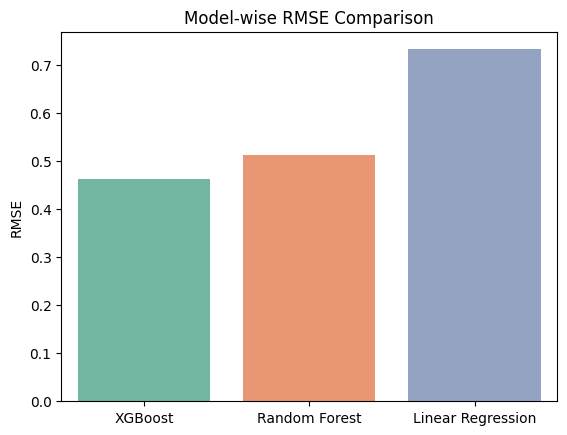

In [162]:
rmse_values = [xgb_rmse, rf_rmse, lr_rmse]
models = ['XGBoost', 'Random Forest', 'Linear Regression']

sns.barplot(x=models, y=rmse_values, palette='Set2',hue=None)
plt.ylabel("RMSE")
plt.title("Model-wise RMSE Comparison")
plt.show()

<ipython-input-164-f1d26403efd9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=mae_values, palette='pastel',hue=None)


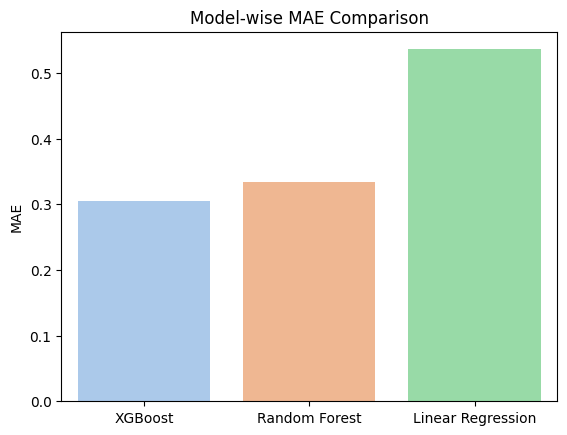

In [164]:
mae_values = [xgb_mae, rf_mae, lr_mae]
models = ['XGBoost', 'Random Forest', 'Linear Regression']

sns.barplot(x=models, y=mae_values, palette='pastel',hue=None)
plt.ylabel("MAE")
plt.title("Model-wise MAE Comparison")
plt.show()


##🔎 Next Steps

Integrate SHAP for model interpretability

Deploy using Streamlit for real-time prediction

Create model pipeline for production readiness

##**📌 Key Takeaways**

- XGBoost significantly outperformed baseline and Random Forest

- Proper hyperparameter tuning improves performance

- Visualization helps in comparing model effectiveness